In [2]:
%matplotlib inline

from toolz import pipe as p

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

import torchvision.transforms.functional as TF

In [3]:
from PIL import Image
im = Image.open('image_data/gossiping/gossiping0002.jpg')

In [4]:
def tensorToData(tensor):
    return tensor.numpy().transpose(1, 2, 0)

def imageToData(image, n_channels=3):
    convert_t = transforms.Compose([
        transforms.ToTensor()
    ])
    
    return p(image, convert_t, tensorToData)

In [5]:
data = imageToData(im, 3)

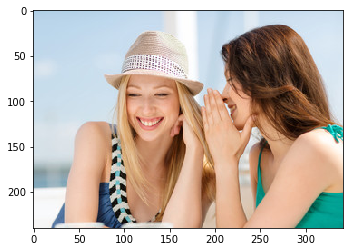

In [6]:
plt.imshow(data)

In [7]:
def calcStep(image, n_steps, use_default = True):
    def topCenterCrop(img):
        (w, h) = im.size
        
        new_h = new_w = 224
        i = 0
        j = int( (w-new_w)/2 )
        return TF.crop(img, i, j, new_h, new_w)
    
    TopCenterCrop = transforms.Lambda(topCenterCrop)
    
    def perImageNorm(tensor):
        mn = [tensor.mean()]
        sd = [tensor.std()]
        return TF.normalize(tensor, mn, sd)
    
    PerImageNorm = transforms.Lambda(perImageNorm)
    
    transforms_list = [
    transforms.Grayscale(),
    transforms.Resize(240),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([.5], [.5])]
    
    if not use_default:
        transforms_list[2] = TopCenterCrop
        transforms_list[4] = PerImageNorm
    
    final_fn = imageToData if n_steps < 5 else tensorToData
    
    data = p(image, transforms.Compose(transforms_list[0:n_steps]), final_fn)
    if data.shape[2] == 1:
        data = np.squeeze(data)
        
    return data

In [8]:
data2 = calcStep(im, 2)

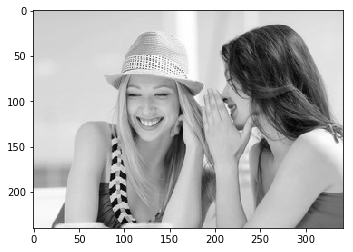

In [9]:
plt.imshow(data2, cmap='gray')

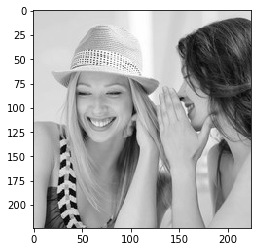

In [10]:
data3 = calcStep(im, 3)
plt.imshow(data3, cmap='gray')

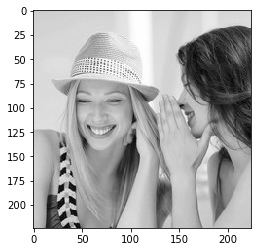

In [11]:
newData3 = calcStep(im, 3, use_default=False)
plt.imshow(newData3, cmap='gray')

In [12]:
data6 = calcStep(im, 5, use_default=False)
data6o = calcStep(im, 6)

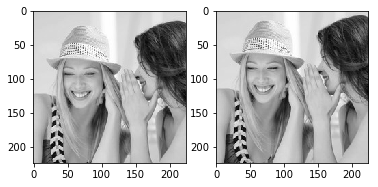

In [13]:
plt.subplot(1, 2, 1)
plt.imshow(data6, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(data6o, cmap='gray')

(array([   834.,   3312.,   2909.,   2314.,   2437.,   5023.,   7362.,
         11496.,  12196.,   2293.]),
 array([-0.99215686, -0.79294118, -0.59372549, -0.3945098 , -0.19529412,
         0.00392157,  0.20313725,  0.40235294,  0.60156863,  0.80078431,  1.        ]),
 <a list of 10 Patch objects>)

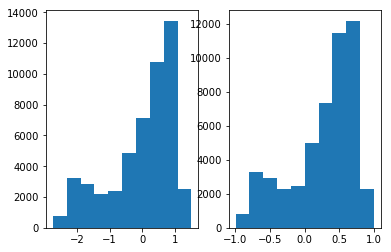

In [14]:
plt.subplot(1, 2, 1)
plt.hist(data6.flatten(), histtype='bar')
plt.subplot(1, 2, 2)
plt.hist(data6o.flatten(), histtype='bar')

In [15]:
print(data6.mean())
print(data6o.mean())

5.63161e-06
0.277894


In [196]:
print(data6.std())
print(data6o.std())

0.99999
0.466441


In [147]:
im.mode

'RGB'

In [150]:
im_gray = Image.open('image_data/gossiping/gossiping0010.jpg')

In [151]:
im_gray.mode

'L'